<a href="https://colab.research.google.com/github/tailagos/socialnetworkinganalysismodel/blob/main/Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import gdown

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Replace this with your Google Drive file URL
file_url = "https://drive.google.com/file/d/1FHZEMtofhoLw_8o5U7Du6bH7qxBkGJym/"
output_file = "Epinions1_dataset.txt"  # Choose a local file name

gdown.download(file_url, output_file, quiet=False)

# Now load the downloaded file, but handling potential HTML content:
try:
    G = nx.read_edgelist(output_file, create_using=nx.DiGraph(), nodetype=int)
except TypeError as e:
    if "<!DOCTYPE" in str(e):
        print("Error: The downloaded file seems to contain HTML content.")
        print("Please check the file URL and ensure it points to a plain text edge list.")
    else:
        raise e  # Re-raise the exception if it's not HTML-related

# Basic stats
print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")
print(f"Density: {nx.density(G)}")

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1FHZEMtofhoLw_8o5U7Du6bH7qxBkGJym/
To: /content/Epinions1_dataset.txt
8.90kB [00:00, 8.17MB/s]

Error: The downloaded file seems to contain HTML content.
Please check the file URL and ensure it points to a plain text edge list.
Nodes: 5
Edges: 6
Density: 0.3


In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Nodes (people)
people = ["You", "Sarah", "Mike", "Emily", "David"]
G.add_nodes_from(people)

# Edges (connections)
edges = [("You", "Sarah"), ("You", "Mike"), ("You", "Emily"),
         ("Sarah", "David"), ("Mike", "David"), ("Emily", "David")]
G.add_edges_from(edges)

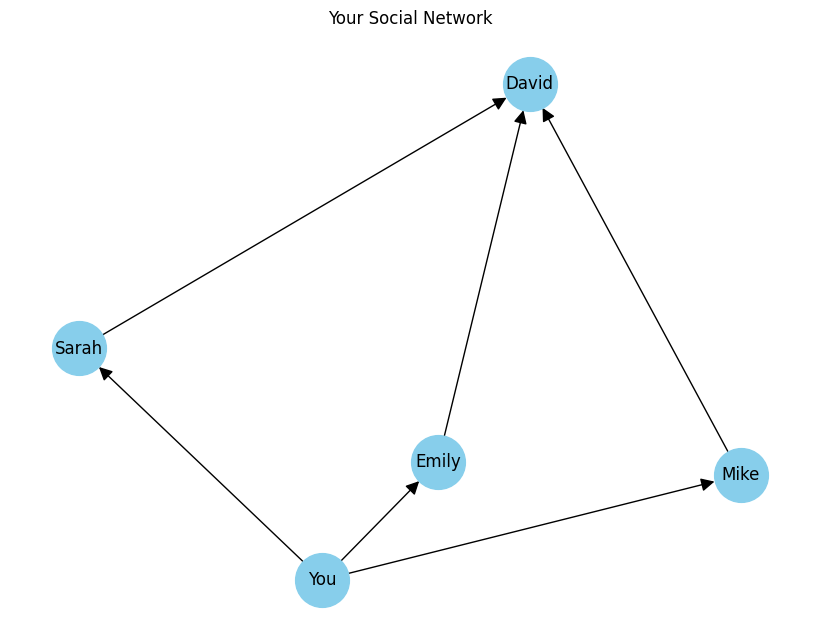

In [ ]:
plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, arrowsize=20)
plt.title("Your Social Network")
plt.show()

In [ ]:
# Louvain is not built-in; using greedy modularity instead
communities = nx.community.greedy_modularity_communities(G.to_undirected())

for i, c in enumerate(communities):
    print(f"Community {i+1}: {list(c)}")

Community 1: ['Emily', 'David', 'You', 'Sarah', 'Mike']
